In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def fric_fun(Fz_abs, v_2d, a_2d, mu_viscous, mu_static):
    v_norm = np.linalg.norm(v_2d)
    v_dir = v_2d/v_norm
    a_norm = np.linalg.norm(a_2d)
    a_dir = a_2d/a_norm

    F_viscous = mu_viscous * Fz_abs * v_dir * np.tanh(100*v_norm) 
    F_static = mu_static * Fz_abs * a_dir * (1-np.tanh(100*v_norm)) * np.tanh(5*a_norm)
    return F_viscous + F_static

AttributeError: 'Axes3D' object has no attribute 'set_equal'

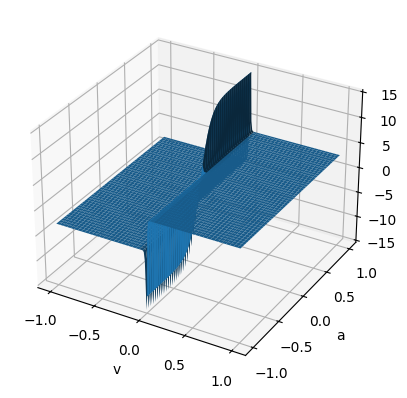

In [7]:
v_range = np.linspace(-1, 1, 200)
a_range = np.linspace(-1, 1, 200)

Fz_abs = 10
mu_viscous = 0.305
mu_static = 2.5

V, A = np.meshgrid(v_range, a_range)
V_flat = V.flatten()
A_flat = A.flatten()

F_list = np.zeros_like(V_flat)
for i in range(len(V_flat)):
    F_list[i] = fric_fun(Fz_abs, V_flat[i], A_flat[i], mu_viscous, mu_static)

F = F_list.reshape(V.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(V, A, F)
ax.set_xlabel('v')
ax.set_ylabel('a')
ax.set_zlabel('F')
ax.set_equal()
plt.show()